In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wndgm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
import pandas as pd
df=pd.read_csv("N Seoul Tower.csv")
df['score']=(df['STAR']>3)
df=df.replace(True,1)
df=df.replace(False,0)
df

,Unnamed: 0,STAR,CONTENT,score
0,0,5.0,Seoul tower is very peacfull and one of clean ...,1
1,1,4.0,We have walked up and down It is a good walk ...,1
2,2,4.0,It was a bit late to open and it was raining ...,1
3,3,5.0,It was nice to be able to see the beautiful n...,1
4,4,5.0,Got there at dusk By the time we got into the ...,1
...,...,...,...,...
5503,5503,3.0,when I visit here there is no cherry blossoms ...,0
5504,5504,4.0,It gives a beautiful view of the city. It is b...,1
5505,5505,4.0,"great view from the observatory, yet Tokyo tow...",1
5506,5506,5.0,There are good trails around here and amazing ...,1


In [32]:
for index, row in df.loc[0:5, :].iterrows():
    text = row['CONTENT']
    print(f'Text {index} : {text.strip()}')
    print('Sentiment:', row['STAR'])
    print('Predicted Sentiment polarity:', SentimentIntensityAnalyzer().polarity_scores(text)['compound']
         )
    print('-'*60)

Text 0 : Seoul tower is very peacfull and one of clean place that I visit in my life Beautiful city view Fantastic gardens trees And I do highly suggest you to visit here if you visit seoul must add on your booking list When you come this place you will love to spend your time
Sentiment: 5.0
Predicted Sentiment polarity: 0.9371
------------------------------------------------------------
Text 1 : We have walked up and down It is a good walk on one side stairs on the other path through the forest Visibility a bit poor but to be expected cloudy weather
Sentiment: 4.0
Predicted Sentiment polarity: -0.0258
------------------------------------------------------------
Text 2 : It was a bit late to open and it was raining and it was hard to wait outside but its still good
Sentiment: 4.0
Predicted Sentiment polarity: 0.5647
------------------------------------------------------------
Text 3 : It was nice to be able to see the beautiful night view of Seoul
Sentiment: 5.0
Predicted Sentiment pol

In [33]:
vd=[]
for a in df['CONTENT']:
    vd.append(SentimentIntensityAnalyzer().polarity_scores(a)['compound'])
df['VADER']=vd
df

,Unnamed: 0,STAR,CONTENT,score,VADER
0,0,5.0,Seoul tower is very peacfull and one of clean ...,1,0.9371
1,1,4.0,We have walked up and down It is a good walk ...,1,-0.0258
2,2,4.0,It was a bit late to open and it was raining ...,1,0.5647
3,3,5.0,It was nice to be able to see the beautiful n...,1,0.7717
4,4,5.0,Got there at dusk By the time we got into the ...,1,0.5791
...,...,...,...,...,...
5503,5503,3.0,when I visit here there is no cherry blossoms ...,0,0.8251
5504,5504,4.0,It gives a beautiful view of the city. It is b...,1,0.9854
5505,5505,4.0,"great view from the observatory, yet Tokyo tow...",1,0.6249
5506,5506,5.0,There are good trails around here and amazing ...,1,0.7717


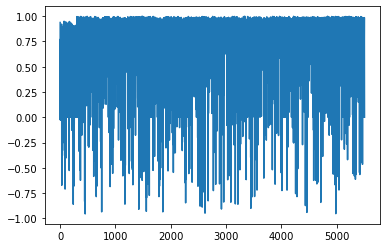

1168 993


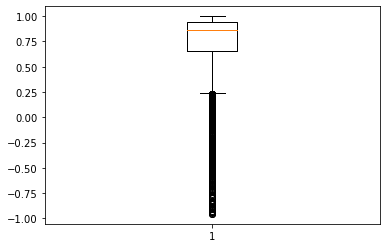

In [45]:
import matplotlib.pyplot as plt
plt.plot(df['VADER'])
plt.show()
df['VADER'].mean()
plt.boxplot(df['VADER'])
print(sum(df['VADER']<0.6),
sum(df['STAR']<=3))

In [37]:
df['vd_score']=(df['VADER']>=0.1)
df=df.replace(True,1)
df=df.replace(False,0)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
cf=pd.DataFrame(confusion_matrix(df['score'],df['vd_score']))
cf

,0,1
0,184,809
1,212,4303
